# Observing the Polarization Properties of Light

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Investigation 1

In [2]:
investigation_1 = pd.read_csv('flux_theta_newZero.txt')
investigation_1.drop(investigation_1.columns[0], axis=1, inplace=True)
investigation_1

,Angle (rad),Light Intensity (%)
0,0.000,29.1
1,0.017,29.1
2,0.052,28.9
3,0.069,28.6
4,0.104,28.3
...,...,...
899,17.697,4.2
900,17.732,4.8
901,17.750,5.3
902,17.767,5.8


### Figure 5

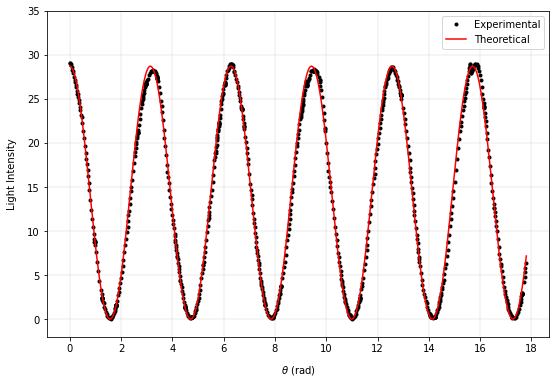

In [3]:
x = investigation_1['Angle (rad)']
y = investigation_1['Light Intensity (%)']
new_y = []
for i in x:
    I0 = 28.7
    I = I0 * math.cos(i)**2
    new_y.append(I)

fig, ax = plt.subplots(figsize=(9,6))

ax.grid(linewidth=0.25)
ax.set_xlabel(r'$\theta$ (rad)', fontsize=10, labelpad=10)
ax.set_ylabel('Light Intensity', fontsize=10, labelpad=10)
ax.set_ylim([-2,35])
ax.xaxis.set_major_locator(plt.MultipleLocator(2))

plt.plot(x, y, '.', color='black', label='Experimental')
plt.plot(x, new_y, linewidth=1.5, color='red', label='Theoretical')
plt.legend(loc='upper right')
plt.show()

### Figure 6

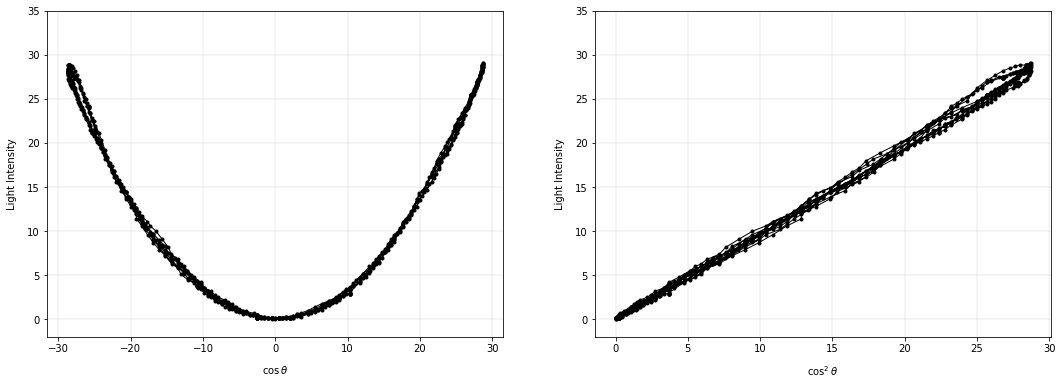

In [5]:
# x values are cos(angle) * (initial amplitude)                                                                         
x_cos = []
for i in x:
    I0 = 28.7
    I = I0 * math.cos(i)
    x_cos.append(I)
    
x_cos2 = []
for i in x:
    I0 = 28.7
    I = I0 * math.cos(i)**2
    x_cos2.append(I)

# plot intensity vs. cos(angle)                                                                                         
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.grid(linewidth=0.25)
ax1.set_xlabel(r'$\cos\,\theta$', fontsize=10, labelpad=10)
ax1.set_ylabel('Light Intensity', fontsize=10, labelpad=10)
ax1.set_ylim([-2, 35])
ax1.plot(x_cos, y, '.', color='black', label=r'I = I$_0\cos\,\theta$')
ax1.plot(x_cos, y, linewidth=1, color='black')
#plt.legend(loc='upper right')

ax2.grid(linewidth=0.25)
ax2.set_xlabel(r'$\cos^2\,\theta$', fontsize=10, labelpad=10)
ax2.set_ylabel('Light Intensity', fontsize=10, labelpad=10)
ax2.set_ylim([-2, 35])
ax2.plot(x_cos2, y, '.', color='black', label=r'I = I$_0\theta$')
ax2.plot(x_cos2, y, linewidth=1, color='black')

plt.show()

## Investigation 2

In [7]:
investigation_2 = pd.read_csv('flux_cosxsinx_clean.txt')
investigation_2.drop(investigation_2.columns[0], axis=1, inplace=True)
investigation_2

,2,4,15,17
0,0.0,0.0,0.20,0.00
1,0.0,0.0,0.10,0.00
2,0.0,0.0,0.20,0.00
3,0.0,0.0,0.10,0.00
4,0.0,0.0,0.20,0.00
...,...,...,...,...
750,NaN,NaN,0.78,457.75
751,NaN,NaN,0.78,457.75
752,NaN,NaN,0.78,457.75
753,NaN,NaN,0.78,457.75


### Figure 7

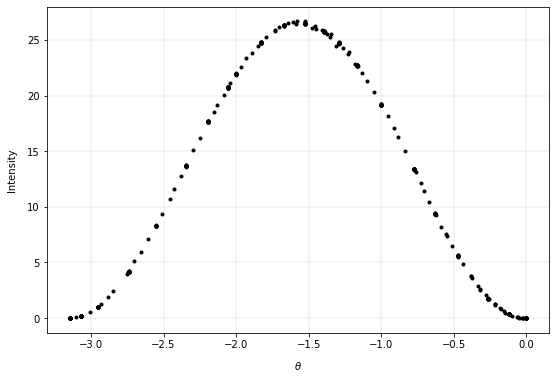

In [9]:
# data for first graph with angle in degrees                                                                            
intensity1 = investigation_2.iloc[:, 0]
theta0_1 = investigation_2.iloc[:, 1]

def deg_to_radian(theta):
    radian = []
    for i in theta:
        rad = i * np.pi / 180
        radian.append(rad)
    return radian

# convert angle from degree to radian                                                                                   
theta1 = deg_to_radian(theta0_1)

fig1, ax1 = plt.subplots(figsize=(9,6))
#fig1.suptitle('Polarized Laser through Two Polarizers', fontsize=14)                                                   

ax1.grid(linewidth=0.25)
ax1.set_xlabel(r'$\theta$', fontsize=10, labelpad=10)
ax1.set_ylabel('Intensity', fontsize=10, labelpad=10)

ax1.plot(theta1, intensity1, '.', color='black')
plt.show()

### Figure 8

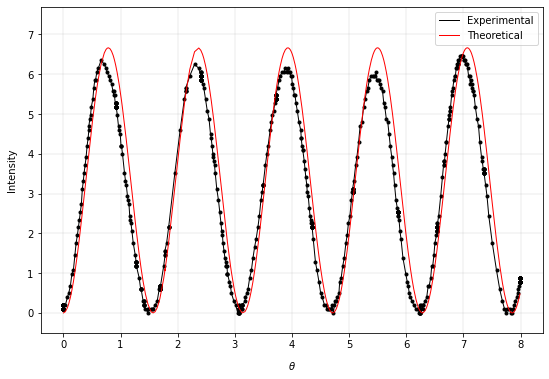

In [11]:
# data for second graph with angle in degrees                                                                           
intensity2 = investigation_2.iloc[:, 2]
theta0_2 = investigation_2.iloc[:, 3]

# convert angle from degree to radian                                                                                   
theta2 = deg_to_radian(theta0_2)

# data for theoretical curve                                                                                            
I0 = 26.66
i_theo = []
for i in theta2:
    I = I0 * np.sin(i)**2 * np.cos(i)**2
    i_theo.append(I)

fig2, ax2 = plt.subplots(figsize=(9,6))
#fig2.suptitle('Polarized Laser through Two Polarizers', fontsize=14)                                                   

ax2.grid(linewidth=0.25)
ax2.set_xlabel(r'$\theta$', fontsize=10, labelpad=10)
ax2.set_ylabel('Intensity', fontsize=10, labelpad=10)
ax2.set_ylim([-0.5, 7.7])

plt.plot(theta2, intensity2, '.', color='black')
plt.plot(theta2, intensity2, linewidth=1, color='black', label='Experimental')
# theoretical curve                                                                                                     
plt.plot(theta2, i_theo, linewidth=1, color='red', label='Theoretical')

plt.legend()
plt.show()


## Investigation 3

In [13]:
investigation_3 = pd.read_csv('basement_data.txt', sep='\t')
investigation_3

,Deg,I (mW/cm^2),deg,I
0,0,36.64,0.0,43.65
1,5,36.51,30.0,41.74
2,10,36.45,60.0,40.38
3,15,36.33,90.0,41.54
4,20,36.40,120.0,43.93
...,...,...,...,...
68,340,36.85,NaN,NaN
69,345,36.58,NaN,NaN
70,350,36.49,NaN,NaN
71,355,36.56,NaN,NaN


### Figure 9

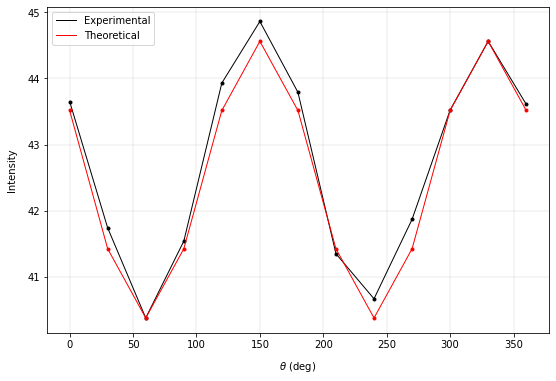

In [14]:
x = investigation_3['deg']
y = investigation_3['I']
theta_deg = x[0:13]
intensity = y[0:13]

# creating theoretical curve                                                                                            
theo = []
for i in theta_deg:
    rad = i * np.pi / 180
    rad_b = np.pi / 6
    I0 = 4.18
    Ib = 40.38
    I = I0 * np.cos(rad + rad_b)**2 + Ib
    theo.append(I)

fig, ax = plt.subplots(figsize=(9,6))
ax.grid(linewidth=0.25)
ax.set_xlabel(r'$\theta$ (deg)', fontsize=10, labelpad=10)
ax.set_ylabel('Intensity', fontsize=10, labelpad=10)

plt.plot(theta_deg, intensity, '.', color='black')
plt.plot(theta_deg, intensity, linewidth=1, color='black', label='Experimental')

plt.plot(theta_deg, theo, '.', color='red')
plt.plot(theta_deg, theo, linewidth=1, color='red', label='Theoretical')

plt.legend()
plt.show()

### Figure 10

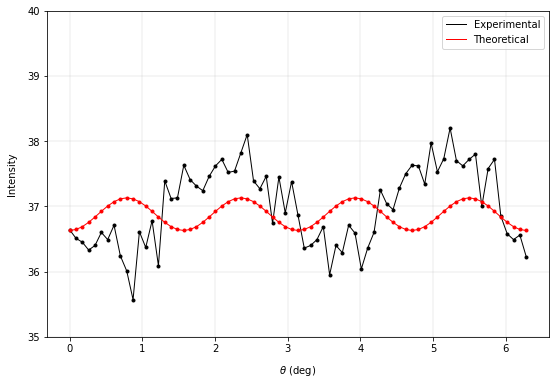

In [15]:
theta_deg = investigation_3['Deg']
intensity = investigation_3['I (mW/cm^2)']

theta = deg_to_radian(theta_deg)

theoretical_intensity = []
for i in theta:
    I = 36.63 +  (4 * np.sin(i)**2 * np.cos(i)**2 * np.sin(np.pi / 4)**2)
    theoretical_intensity.append(I)

fig, ax = plt.subplots(figsize=(9,6))
ax.grid(linewidth=0.25)
ax.set_xlabel(r'$\theta$ (deg)', fontsize=10, labelpad=10)
ax.set_ylabel('Intensity', fontsize=10, labelpad=10)
ax.set_ylim([35, 40])

plt.plot(theta, intensity, '.', color='black')
plt.plot(theta, intensity, linewidth=1, color='black', label='Experimental')
plt.plot(theta, theoretical_intensity, '.', color='red')
plt.plot(theta, theoretical_intensity, linewidth=1, color='red', label='Theoretical')
plt.legend()
plt.show()

### Figure 11

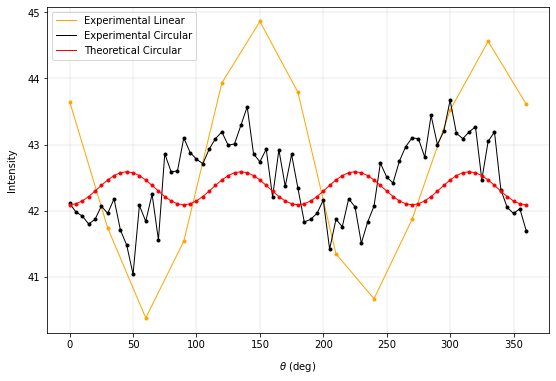

In [16]:
theta_deg_qw = investigation_3['Deg']
intensity_qw = investigation_3['I (mW/cm^2)']

intensity_qw_1 = []
for i in intensity_qw:
    adjusted_intensity = i + 5.47
    intensity_qw_1.append(adjusted_intensity)

theta_no_qw = x
intensity_no_qw = y

theta_no_qw = theta_no_qw[0:13]
intensity_no_qw = intensity_no_qw[0:13]

intensity_theo = []
for i in theta_deg_qw:
    rad = i * np.pi / 180
    I = 42.09 + 4 * np.sin(rad)**2 * np.cos(rad)**2 * np.sin(np.pi / 4)**2
    intensity_theo.append(I)

fig, ax = plt.subplots(figsize=(9,6))
ax.grid(linewidth=0.25)
ax.set_xlabel(r'$\theta$ (deg)', fontsize=10, labelpad=10)
ax.set_ylabel('Intensity', fontsize=10, labelpad=10)

plt.plot(theta_no_qw, intensity_no_qw, '.', color='orange')
plt.plot(theta_no_qw, intensity_no_qw, linewidth=1, color='orange', label='Experimental Linear')

plt.plot(theta_deg_qw, intensity_qw_1, '.', color='black')
plt.plot(theta_deg_qw, intensity_qw_1, linewidth=1, color='black', label='Experimental Circular')

plt.plot(theta_deg_qw, intensity_theo, '.', color='red')
plt.plot(theta_deg_qw, intensity_theo, linewidth=1, color='red', label='Theoretical Circular')

plt.legend()
plt.show()

## Investigation 4

In [20]:
data_lin = pd.read_csv('no_qw_CLEAN.txt')
data_circ = pd.read_csv('quarter_wave_CLEAN.txt')

for data in [data_lin, data_circ]:
    data.drop(data.columns[0], axis=1, inplace=True)

In [23]:
data_lin.head()

,Angle (rad),Light Intensity (%)
0,0.0,9.6
1,0.0,9.6
2,0.0,9.6
3,0.0,9.6
4,0.0,9.6


In [24]:
data_circ.head()

,Angle (rad),Light Intensity (%)
0,0.017,16.4
1,0.017,16.3
2,0.017,16.3
3,0.017,16.4
4,0.017,16.4


### Figure 12

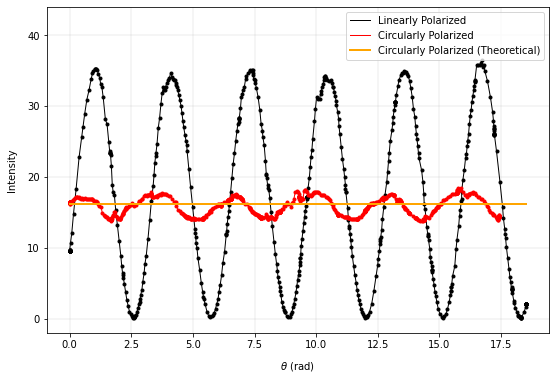

In [26]:
theta_lin = data_lin['Angle (rad)']
intensity_lin = data_lin['Light Intensity (%)']
                         
theta_circ = data_circ['Angle (rad)']
intensity_circ = data_circ['Light Intensity (%)']

x_lin = theta_lin[1:].astype(float)
y_lin = intensity_lin[1:].astype(float)

x_circ = theta_circ[1:].astype(float)
y_circ = intensity_circ[1:].astype(float)

x_theo = x_lin
y_theo = []
for i in x_theo:
    I =15.7248 + (1 + np.cos(np.pi/2) * np.cos(2*i)) / 2
    y_theo.append(I)

fig, ax = plt.subplots(figsize=(9,6))
#fig.suptitle('Linearly Polarized Light vs. Circularly Polarized Light\n (with separate quarter-wave plate)', fontsize=14)                                                                                                          
ax.grid(linewidth=0.25)
ax.set_xlabel(r'$\theta$ (rad)', fontsize=10, labelpad=10)
ax.set_ylabel('Intensity', fontsize=10,labelpad=10)
ax.set_ylim([-2, 44])

plt.plot(x_lin, y_lin, '.', color='black')
plt.plot(x_lin, y_lin, linewidth=1, color='black', label='Linearly Polarized')

plt.plot(x_circ, y_circ, '.', color='red')
plt.plot(x_circ, y_circ, linewidth=1, color='red', label='Circularly Polarized')

plt.plot(x_theo, y_theo, linewidth=2, color='orange', label='Circularly Polarized (Theoretical)')

plt.legend()
plt.show()
